In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

2.7.0


In [2]:
#이미지의 셋을 읽어오자

(train_images, train_labels), (test_images, test_label)=datasets.mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [3]:
train_images[0].shape  # ===> (28, 28) 
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
test_images[0], test_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [5]:
#이미지 전처리 
#1. 4차원을 만들어주세요
# 1) 이미지 셋 자체는 3차원: 이미지 2차원+여러장
# 2) 이미지 픽셀미디어의 특징을 추출하는 처리를 하기위한 차원 하나더 추가
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))




In [6]:
#2. 데이터를 읽어왔을때 픽셀마다의 값의 명암정도만 가지고 있음(-~255)
# 1) 표준화를 시켜줌
# 2) 방법 > 다 255로 나누어줌
# 3) 이미지는 크기가 매우 다양하므로 크기도 표준화시킨다. 

train_images, test_images=train_images.astype("float")/255.0,test_images.astype("float")/255.0


In [7]:
# 특성 추출 처리 
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [8]:
#특성 추출한 결과를 학습데이터로 넣어서 학습할 예정 (Deep Modeling)
# 1. 특성 추출한 이미지 데이터를 1차원으로 만들어라 (Flatten)
# 2. 딥러닝 심층 신경망(Deep MLP )
# 3. fit()


model.add(layers.Flatten()) #입력층
model.add(layers.Dense(64,activation='relu'))#히든층
model.add(layers.Dense(64,activation='softmax'))#ㅜ출력층
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
#모델 평가
#1. test데이터를 검증하여 overfitting여부 확인!!!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_images,train_labels, epochs=3,batch_size=100)
history

Epoch 1/3
600/600 [==============================] - 14s 23ms/step - loss: 0.2984 - accuracy: 0.9108
Epoch 2/3
600/600 [==============================] - 15s 25ms/step - loss: 0.0643 - accuracy: 0.9803
Epoch 3/3
600/600 [==============================] - 18s 29ms/step - loss: 0.0438 - accuracy: 0.9862


In [11]:
loss,acc=model.evaluate(test_images, test_label, verbose=2)

313/313 - 2s - loss: 0.0373 - accuracy: 0.9881 - 2s/epoch - 5ms/step


예측

In [12]:
y_pred = model.predict(test_images)
y_pred[0]

array([5.55052218e-08, 1.51233007e-06, 6.56658176e-06, 6.90850129e-06,
       9.38286693e-09, 3.12699910e-08, 1.15991508e-10, 9.99983072e-01,
       3.43393538e-07, 1.41166595e-06, 1.26412321e-08, 1.08354006e-10,
       1.40987153e-11, 1.11921867e-08, 4.61552463e-10, 3.11095420e-12,
       4.91699736e-10, 1.81612006e-12, 3.41156400e-12, 5.81651449e-10,
       6.18633478e-10, 1.75641402e-12, 2.31435444e-11, 1.40544565e-09,
       3.21420321e-12, 3.98447358e-10, 1.44434478e-10, 4.21938179e-10,
       5.83161557e-12, 1.15215745e-11, 6.56577501e-11, 1.21919663e-09,
       2.95917154e-12, 2.44868875e-10, 3.89417343e-09, 7.10310283e-11,
       6.66487351e-11, 1.05693032e-11, 2.33895947e-09, 6.19603813e-11,
       2.33815314e-08, 1.00003794e-12, 7.05264291e-10, 6.25760624e-11,
       1.87233056e-08, 1.64182529e-10, 2.96890557e-09, 6.30913211e-10,
       9.05527653e-09, 1.68980682e-12, 1.28731498e-10, 9.92110802e-15,
       1.07096085e-11, 1.42792254e-11, 5.96917460e-10, 7.05143886e-12,
      

In [13]:
import numpy as np

In [14]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index

7

In [15]:
y_pred_test = np.argmax(y_pred, axis= -1)
y_pred_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
from sklearn.metrics import r2_score, confusion_matrix
R2 = r2_score(test_label, y_pred_test, multioutput='variance_weighted')
R2

0.9749797155616786

In [17]:
conf_matrix= confusion_matrix(test_label, y_pred_test)
conf_matrix

array([[ 970,    0,    3,    0,    0,    0,    3,    3,    1,    0],
       [   0, 1129,    2,    1,    0,    0,    1,    2,    0,    0],
       [   1,    1, 1022,    0,    0,    0,    0,    8,    0,    0],
       [   0,    0,    2, 1004,    0,    2,    0,    2,    0,    0],
       [   0,    0,    2,    0,  970,    0,    2,    3,    0,    5],
       [   2,    0,    0,    5,    0,  882,    1,    1,    0,    1],
       [   3,    2,    0,    0,    1,    6,  945,    0,    1,    0],
       [   0,    1,    1,    1,    0,    0,    0, 1023,    0,    2],
       [   2,    0,    2,    2,    0,    6,    1,    4,  954,    3],
       [   3,    1,    0,    1,    2,    9,    1,   10,    0,  982]],
      dtype=int64)

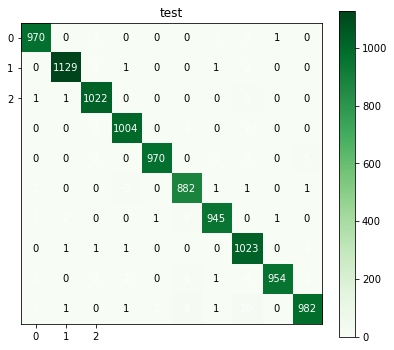

In [18]:
import matplotlib.pyplot as plt

title = 'test'
cmap=plt.cm.Greens
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(3), ('0', '1', '2'))
plt.yticks(np.arange(3), ('0', '1', '2'))


fmt = 'd' 
thresh = 1
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")  #horizontalalignment

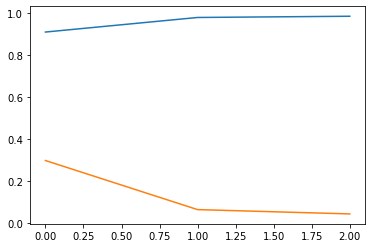

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()